In [2]:
import os
base_path="C:\\Users\\i345144\\OneDrive\\Documents\\MSRUS\\Probabilistic Graphical Models\\Lab Exam\\Lab Exam"

os.chdir(base_path)


from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine


# Importing necessary library
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import ne_chunk

import nltk

# uncomment and run when using first time
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('words')
#nltk.download('maxent_ne_chunker')




In [3]:
my_file = os.path.join(base_path + "/" + "panchatantra-tales_complete.pdf")
fp = open(my_file, 'rb')
parser = PDFParser(fp)
doc = PDFDocument(parser)
#parser.set_document(doc)
#doc.set_parser(parser)
#doc.initialize('')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
laparams.char_margin = 1.0
laparams.word_margin = 1.0
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)

extracted_text = ''

for page in PDFPage.create_pages(doc):
        interpreter.process_page(page)
        layout = device.get_result()
        for lt_obj in layout:
            if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
                extracted_text += lt_obj.get_text()
                
#print(extracted_text)

In [5]:
start =extracted_text.find("1.The Monkey And The Wedge")
end=extracted_text.find("2.The Jackal And The Drum")

print(start, end)

6337 10051


In [45]:
story= extracted_text[start:end]
print(story[0:500])
#printing limited characters

1.The Monkey And The Wedge 
A merchant once started building a temple in the middle of his garden. Many masons and carpenters were 
working for the merchant. They took time off every day to go to the town for their lunch. One day, when the 
workers left for lunch a batch of monkeys landed at the temple site and began playing with whatever caught 
their fancy. One of the monkeys saw a partly sawed log of wood and a wedge fixed in it so that it does not 
close up. 
Curious to know what it is, the 


In [7]:
# Passing the string text into word tokenize for breaking the sentences
word_tokens = word_tokenize(story)
#print(word_tokens)

In [8]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
fdist = FreqDist(word_tokens)
fdist

FreqDist({'the': 52, '.': 40, ',': 39, 'of': 24, 'to': 20, '“': 18, '”': 17, 'king': 16, 'and': 13, 'is': 13, ...})

In [9]:
# To find the frequency of top 10 words
fdist1 = fdist.most_common(10)
fdist1

[('the', 52),
 ('.', 40),
 (',', 39),
 ('of', 24),
 ('to', 20),
 ('“', 18),
 ('”', 17),
 ('king', 16),
 ('and', 13),
 ('is', 13)]

In [12]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(word_tokens[0:30]) 
print(filtered_sentence[0:30]) 


['1.The', 'Monkey', 'And', 'The', 'Wedge', 'A', 'merchant', 'once', 'started', 'building', 'a', 'temple', 'in', 'the', 'middle', 'of', 'his', 'garden', '.', 'Many', 'masons', 'and', 'carpenters', 'were', 'working', 'for', 'the', 'merchant', '.', 'They']
['1.The', 'Monkey', 'And', 'The', 'Wedge', 'A', 'merchant', 'started', 'building', 'temple', 'middle', 'garden', '.', 'Many', 'masons', 'carpenters', 'working', 'merchant', '.', 'They', 'took', 'time', 'every', 'day', 'go', 'town', 'lunch', '.', 'One', 'day']


In [46]:
#POS Tagging
for tex in word_tokens:
    pos_tag=nltk.pos_tag([tex])
    #print(pos_tag)

## for brevity, printing only limited number of POS_tag as below, otherwise upper loop prints all POS
for tex in word_tokens[0:20]:
    pos_tag=nltk.pos_tag([tex])
    print(pos_tag)

[('1.The', 'CD')]
[('Monkey', 'NN')]
[('And', 'CC')]
[('The', 'DT')]
[('Wedge', 'NN')]
[('A', 'DT')]
[('merchant', 'NN')]
[('once', 'RB')]
[('started', 'VBN')]
[('building', 'NN')]
[('a', 'DT')]
[('temple', 'NN')]
[('in', 'IN')]
[('the', 'DT')]
[('middle', 'NN')]
[('of', 'IN')]
[('his', 'PRP$')]
[('garden', 'NN')]
[('.', '.')]
[('Many', 'JJ')]


In [18]:
from nltk import CFG
groucho_grammar = CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [19]:
# ref: http://www.nltk.org/book_1ed/ch08.html

sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
trees = parser.parse(sent)
for tree in trees:
    print (tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [5]:
## part C begins here

In [20]:
#conda install -c conda-forge spacy=2.2.1
# conda install -c conda-forge spacy-model-en_core_web_sm
#https://www.analyticsvidhya.com/blog/2019/10/how-to-build-knowledge-graph-text-using-spacy/
import spacy
print(spacy.__version__)

### extracting dependency parsing because POS tagging is not sufficient many times
nlp = spacy.load('en_core_web_sm')

#Example
doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

2.2.1
The ... det
22-year ... npadvmod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


In [21]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline


In [38]:
doc=nlp(story)
# for bravity, printing only limited output
for tok in doc[0:20]:
  print(tok.text, "...", tok.dep_)

1.The ... nummod
Monkey ... ROOT
And ... cc
The ... det
Wedge ... conj

 ... 
A ... det
merchant ... nsubj
once ... advmod
started ... ROOT
building ... xcomp
a ... det
temple ... dobj
in ... prep
the ... det
middle ... pobj
of ... prep
his ... poss
garden ... pobj
. ... punct


In [23]:
#The main idea is to go through a sentence and extract the subject and the object as and when they are encountered so that we can
# have nodes and edges for the graph

def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]


In [24]:
from nltk import sent_tokenize

sentence=sent_tokenize(story)
print (sentence[0])

1.The Monkey And The Wedge 
A merchant once started building a temple in the middle of his garden.


In [25]:
entity_pairs = []

for i in tqdm(sentence):
    entity_pairs.append(get_entities(i))

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 70.81it/s]


In [26]:
entity_pairs[10:20]

[['Food', 'life'],
 ['wise  men', 'friends'],
 ['', 'hundred  food'],
 ['matters', 'full  learning'],
 ['long  we', 'long  leftovers'],
 ['also  Karataka', 'only  insult'],
 ['who', 'long  run'],
 ['where  he', ''],
 ['why  king', 'one day office'],
 ['It', 'good  king']]

In [27]:
#Our hypothesis is that the predicate is actually the main verb in a sentence.
#The function below is capable of capturing such predicates from the sentences.
#The pattern defined in the function tries to find the ROOT word or the main verb in the sentence. 
#Once the ROOT is identified, then the pattern checks whether it is followed by a preposition (‘prep’) 
#or an agent word. If yes, then it is added to the ROOT word.


# some patterns and their meaning

#GDP --> nsubj --> NOUN
#in --> prep --> ADP
#developing --> amod --> VERB
#countries --> pobj --> NOUN
#such --> amod --> ADJ
#as --> prep --> ADP
#Vietnam --> pobj --> PROPN
#will --> aux --> VERB
#continue --> ROOT --> VERB
#growing --> xcomp --> VERB
#at --> prep --> ADP
#a --> det --> DET
#high --> amod --> ADJ
#rate --> pobj --> NOUN
#. --> punct --> PUNCT

def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"},
            {"POS": "ADV", "OP": "*"},
            {'DEP':'amod', 'OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [28]:
relations = [get_relation(i) for i in tqdm(sentence)]

100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 66.67it/s]


In [29]:
print(relations)

['started', 'were', 'took', 'day', 'saw', 'began furiously', 'came', 'died', 'told', 'have', 'retorted', 'said', 'are', 'is', 'True', 'said', 'said', 'one', 'will', 'is necessary', 'asked', 'know', 'indicate', 'said', 'asked', 'told', 'said', 'Taking', 'told', 'came', 'said', 'know of', 'are', 'served', 'are', 'ordered', 'asked', 'heard', 'want', 'wish', 'said']


In [30]:
#most frequent relations or predicates that we have just extracted:
pd.Series(relations).value_counts()[:10]

said            7
told            3
asked           3
are             3
came            2
one             1
heard           1
started         1
know            1
is necessary    1
dtype: int64

In [31]:
total= len(relations)
total
### joint probability table
prob_table = pd.Series(relations).value_counts()[:10]/ total
print(prob_table)

said            0.170732
told            0.073171
asked           0.073171
are             0.073171
came            0.048780
one             0.024390
heard           0.024390
started         0.024390
know            0.024390
is necessary    0.024390
dtype: float64


In [32]:
#we create a dataframe of entities and predicates:

# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [84]:
#print(source[1:10])
#print(target[1:10])

print(kg_df)

                source            target          edge
0      1.The  merchant      once  garden       started
1         Many  masons          merchant          were
2                 They        day  lunch          took
3      temple whatever       temple site           day
4            sawed  it         sawed  it           saw
5               monkey  furiously  wedge         began
6                wedge               log          came
7       closed  monkey      closed  wood          died
8                 that           affairs          told
9                   We        food store          have
10                Food              life      retorted
11           wise  men           friends          said
12                         hundred  food           are
13             matters    full  learning            is
14            long  we   long  leftovers          True
15      also  Karataka      only  insult          said
16                 who         long  run          said
17        

In [33]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

C:\Users\i345144\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\i345144\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


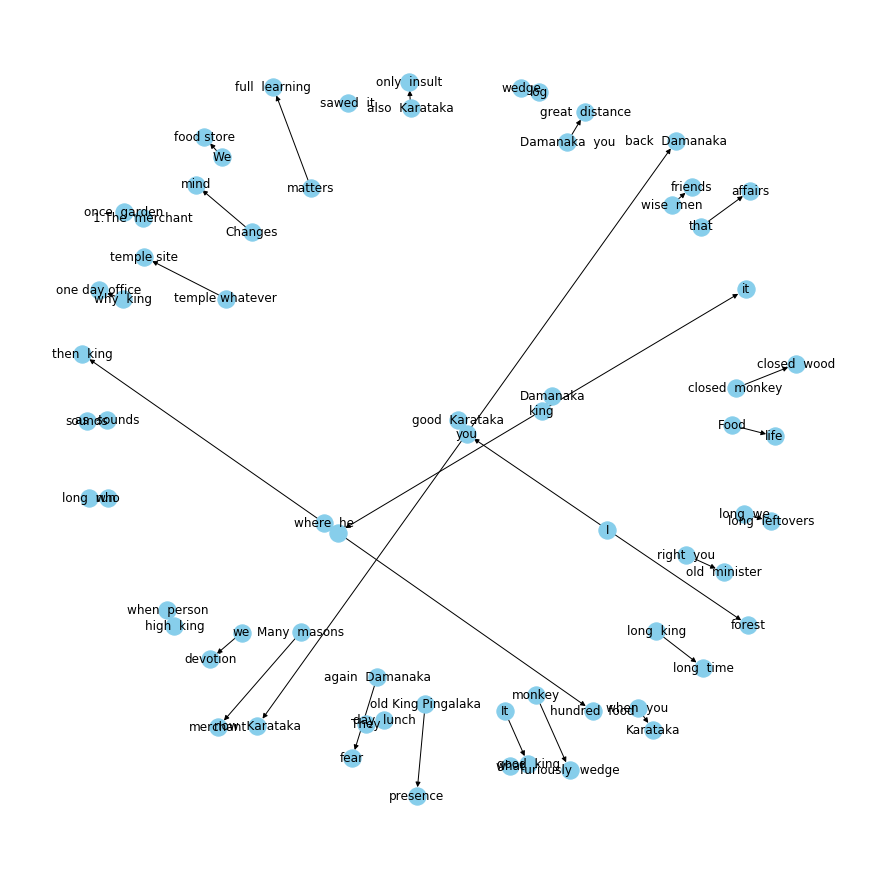

In [34]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

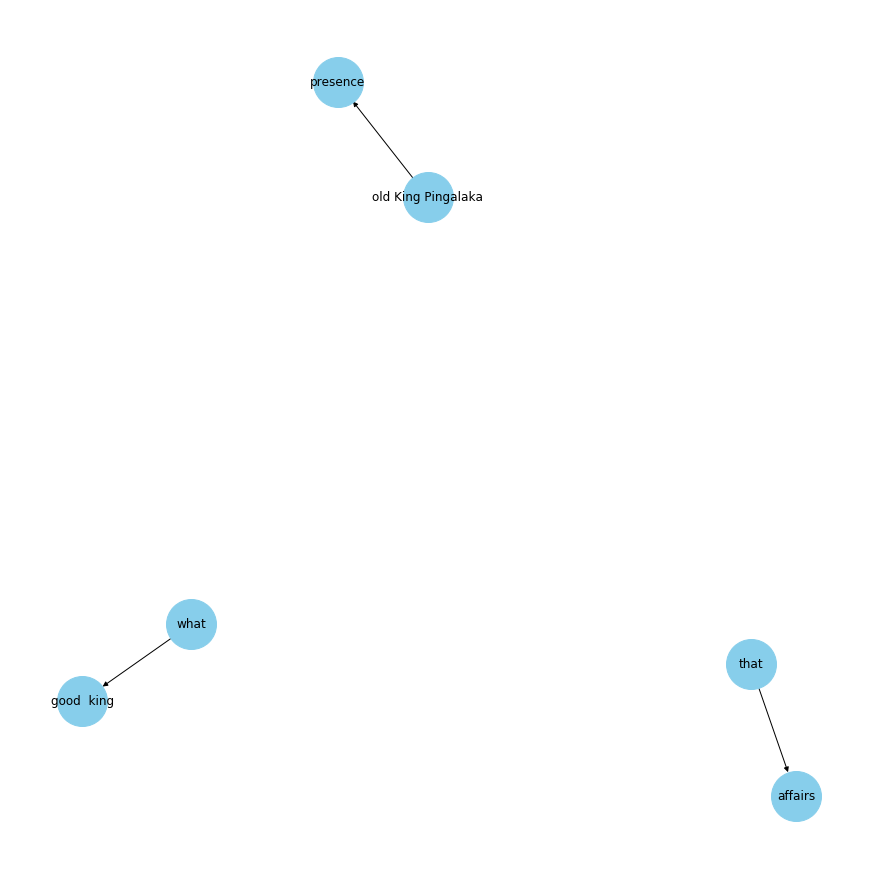

In [35]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="told"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

# The End